In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import chi2
from scipy.stats import norm
import tool

In [2]:
file_name = "set_2.csv"
arr = tool.get_arr(file_name, float)
arr.sort()
n = len(arr)
arr

[-1071.786686,
 -1049.024063,
 -999.453038,
 -885.478549,
 -712.61829,
 -689.477187,
 -671.047647,
 -660.206981,
 -656.290311,
 -638.579986,
 -630.631216,
 -626.870552,
 -625.894268,
 -622.34542,
 -621.720214,
 -612.863464,
 -609.63412,
 -582.02842,
 -574.339773,
 -573.975761,
 -572.130802,
 -570.104485,
 -568.662984,
 -568.287892,
 -566.010349,
 -554.684013,
 -552.644286,
 -552.393594,
 -550.635866,
 -544.980927,
 -540.198011,
 -537.696115,
 -536.589035,
 -531.173852,
 -527.777095,
 -527.452479,
 -523.460457,
 -518.66588,
 -518.059922,
 -517.246434,
 -513.343579,
 -510.3776,
 -507.48267,
 -506.36209,
 -506.139453,
 -499.316464,
 -498.314028,
 -494.951384,
 -493.571292,
 -492.141179,
 -490.480473,
 -488.961111,
 -485.434348,
 -482.484953,
 -473.060397,
 -470.515607,
 -469.048631,
 -466.884103,
 -466.713088,
 -463.412375,
 -462.749311,
 -461.137393,
 -458.300145,
 -457.4364,
 -457.103478,
 -455.793418,
 -453.372719,
 -453.17347,
 -452.869961,
 -451.487807,
 -445.781023,
 -445.433431,
 -

In [3]:
mean = tool.get_expectation(arr)
mean

16.243283213799923

In [4]:
dispersion = tool.get_dispersion(arr)
dispersion

10928.497477401086

In [5]:
st_dev= np.sqrt(dispersion)
st_dev

104.53945416636289

In [6]:
x = np.linspace(-250, 250, 1000)
y = tool.f_normal(x, mean, st_dev)

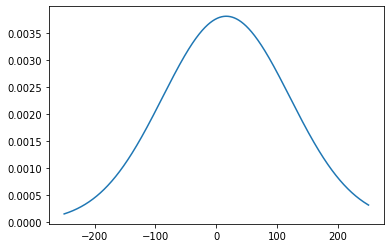

In [7]:
plt.plot(x, y)

In [8]:
st_dev -= 19.1

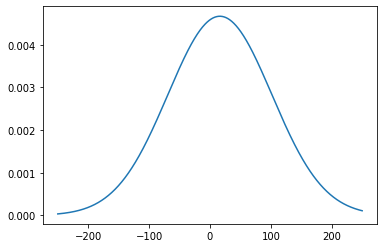

In [9]:
x1 = np.linspace(-250, 250, 1000)
y1 = tool.f_normal(x, mean, st_dev)
plt.plot(x1, y1)

In [10]:
intervals = np.linspace(-250, 250, 35)
statistical_series = {(intervals[i], intervals[i + 1]): 0 for i in range(len(intervals) - 1)}
for element in arr:
    for i in range(len(intervals) - 1):
        if element >= intervals[i] and element <= intervals[i + 1]:
            statistical_series[(intervals[i], intervals[i + 1])] += 1
 

In [11]:
statistical_series

{(-250.0, -235.2941176470588): 10,
 (-235.2941176470588, -220.58823529411765): 12,
 (-220.58823529411765, -205.88235294117646): 17,
 (-205.88235294117646, -191.1764705882353): 26,
 (-191.1764705882353, -176.47058823529412): 38,
 (-176.47058823529412, -161.76470588235293): 53,
 (-161.76470588235293, -147.05882352941177): 76,
 (-147.05882352941177, -132.3529411764706): 114,
 (-132.3529411764706, -117.64705882352942): 170,
 (-117.64705882352942, -102.94117647058823): 208,
 (-102.94117647058823, -88.23529411764707): 278,
 (-88.23529411764707, -73.52941176470588): 344,
 (-73.52941176470588, -58.823529411764724): 393,
 (-58.823529411764724, -44.117647058823536): 472,
 (-44.117647058823536, -29.411764705882376): 555,
 (-29.411764705882376, -14.705882352941188): 632,
 (-14.705882352941188, 0.0): 612,
 (0.0, 14.70588235294116): 677,
 (14.70588235294116, 29.41176470588232): 688,
 (29.41176470588232, 44.117647058823536): 663,
 (44.117647058823536, 58.823529411764696): 660,
 (58.823529411764696, 7

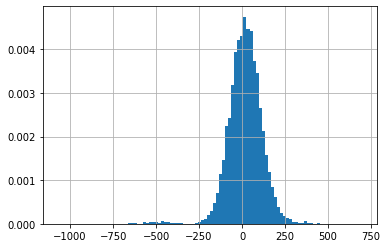

In [12]:
    plt.hist(arr, 100, density=True)
    plt.grid()
    plt.show()


In [13]:
sum = 0
for key, value in statistical_series.items():
        pi = norm.cdf((key[1] - mean) / st_dev) - norm.cdf((key[0] - mean) / st_dev)
        npi = pi * n
        sum += ((value - npi)**2) / npi
    
critical_chi2 = chi2.ppf(0.7, len(statistical_series) - 3)
critical_chi2

34.59813135402172

In [14]:
sum

35.59065522141329

In [16]:
tool.get_mean_confidence_interval(arr, 0.99)

(13.810820283893207, 18.67574614370664)

In [18]:
tool.get_standard_deviation_conf_interval(arr, 0.99)

(102.6671845029745, 106.47651475565131)